In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PyAstronomy import pyasl
from datetime import datetime

from NEID_solar_functions import *
# from GP_kernels import *

from astropy.timeseries import LombScargle
from datetime import timedelta, date
from datetime import datetime
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.signal import hilbert, chirp


#----------------------------------
# Read data
#----------------------------------

v_grid  = np.loadtxt('./data_v4/v_grid.txt')
CCF     = np.loadtxt('./data_v4/CCF.txt')
σCCF   = np.loadtxt('./data_v4/σCCF.txt')
bjd     = np.loadtxt('./data_v4/bjd.txt')
rv      = np.loadtxt('./data_v4/rv.txt')
σrv     = np.loadtxt('./data_v4/σrv.txt')
idx_rej = np.array(np.loadtxt('idx_rej'), dtype=bool)

In [3]:
from scipy import stats
from scipy.signal import find_peaks

def moving_ave(t, y, width=2):
    w_aves = []
    for t_i in t:
        weights = stats.norm.pdf(t, t_i, width)
        # weights = np.multiply(abs(array_x-t_i)<width, 1) 
        w_ave, _ = weighted_avg_and_std(y, weights)
        w_aves.append(w_ave)
        # w_stds.append(w_std)
    return np.array(w_aves)


def ts_statistics(t, title, Delta_t_max, width=0.2, simple_plot=True):
    
    if simple_plot == False:
        fig = plt.figure(figsize=(15, 18))
        plt.subplots_adjust(right=0.85, hspace=0.5)
    else:
        fig = plt.figure(figsize=(15, 12))
        plt.subplots_adjust(right=0.85, hspace=0.3)
        
    plt.rcParams.update({'font.size': 12})

    # Fig 1 - data time series 
    if simple_plot == False:
        plt.subplot(611)
    else:
        plt.subplot(311)
    plt.title(title)
    plt.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
    x = np.linspace(min(t), max(t), 10*len(t))
    pred_mean, pred_var = gp.predict(y, x, return_var=True)
    pred_std = np.sqrt(pred_var)        
    plt.plot(x, pred_mean, color='r', alpha=0.3)
    plt.fill_between(x, pred_mean+pred_std, pred_mean-pred_std, color='r', alpha=0.1,
                     edgecolor="none")
    plt.xlabel("T [minutes]")
    plt.ylabel("RV [m/s]")
    plt.grid()

    
    # Fig 2 - Covariance 
    if simple_plot == False:
        plt.subplot(612)
    else:
        plt.subplot(312)
    Delta_t = np.linspace(0, Delta_t_max, 5*len(t[t<Delta_t_max]))
    cov_XY = []
    for delta_t in Delta_t:
        X = y[t<(max(t)-delta_t)]
        Y, _ = gp.predict(y, t[t<(max(t)-delta_t)]+delta_t, return_var=False)
        cov_XY.append(cov(X, Y))
    cov_XY = np.array(cov_XY)
    analytic_signal = hilbert(cov_XY)
    amplitude_envelope = np.abs(analytic_signal)
    amplitude_envelope = moving_ave(Delta_t, amplitude_envelope, width=2)

    peaks, prop = find_peaks(amplitude_envelope)
    
    ax.plot(plot_x[idxx][peaks], power[idxx][peaks], "ro")

        
    # kr = KernelReg(amplitude_envelope, Delta_t, 'c')
    # ae_pred, ae_std = kr.fit(Delta_t)
    plt.plot(Delta_t, cov_XY, 'k.-', alpha=0.5)
    plt.plot(Delta_t, amplitude_envelope, 'm', lw=5, alpha=0.4)
    plt.plot(Delta_t, -amplitude_envelope, 'm', lw=5, alpha=0.4)        
    plt.xlabel(r'$\Delta$T [minutes]')
    plt.ylabel(r'Covariance [m$^2$/s$^2$]')
    if max(Delta_t)>250:
        plt.xlim([0,250])
    plt.grid()
    
    # plt.savefig('./NEID_cov/'+title+'.png')
    plt.show()
    
    return Delta_t, amplitude_envelope

Text(0, 0.5, 'Cov')

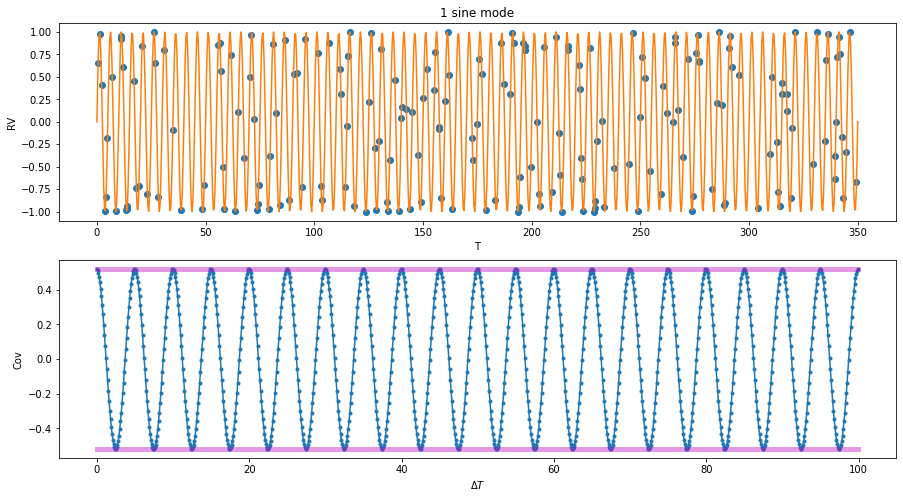

In [4]:
t = np.sort(np.random.uniform(low=0.0, high=350, size=200))
t_plot = np.linspace(0,350,1000)

def function1(t):
    return np.sin(2*np.pi/5*t)

Delta_t = np.arange(1000)/10
cov_XY = []
for delta_t in Delta_t:
    X = function1(t)
    Y = function1(t+delta_t)
    cov_XY.append(cov(X, Y))
cov_XY = np.array(cov_XY)
analytic_signal = hilbert(cov_XY)
amplitude_envelope = np.abs(analytic_signal)
amplitude_envelope = moving_ave(Delta_t, amplitude_envelope, width=2)

fig = plt.figure(figsize=(15, 8))

plt.subplot(211)
title='1 sine mode'
plt.title(title)
plt.plot(t, function1(t), 'o')
plt.xlabel('T')
plt.ylabel('RV')
plt.plot(t_plot, function1(t_plot))

plt.subplot(212)
plt.plot(Delta_t, cov_XY, '.-')
plt.plot(Delta_t, amplitude_envelope, 'm', lw=5, alpha=0.4)
plt.plot(Delta_t, -amplitude_envelope, 'm', lw=5, alpha=0.4)
plt.xlabel(r'$\Delta T$')
plt.ylabel('Cov')

In [5]:
t = np.sort(np.random.uniform(low=0.0, high=350, size=200))
t_plot = np.linspace(0,350,1000)

def function2(t):
    return np.sin(2*np.pi/5*t) + 0.5*np.sin(2*np.pi/5.5*t)

Delta_t = np.arange(3000)/10
cov_XY = []
for delta_t in Delta_t:
    X = function2(t)
    Y = function2(t+delta_t)
    cov_XY.append(cov(X, Y))
cov_XY = np.array(cov_XY)
analytic_signal = hilbert(cov_XY)
amplitude_envelope = np.abs(analytic_signal)
amplitude_envelope = moving_ave(Delta_t, amplitude_envelope, width=2)



Text(0, 0.5, 'Cov')

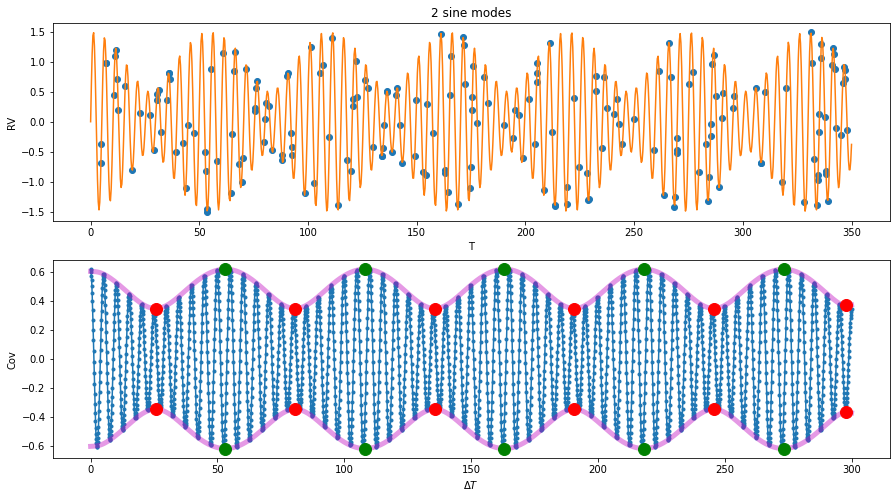

In [10]:
%matplotlib inline
# %matplotlib widget
peaks1, prop1 = find_peaks(amplitude_envelope, height=0.1)
peaks2, prop2 = find_peaks(-amplitude_envelope, height=-10)

fig = plt.figure(figsize=(15, 8))

plt.subplot(211)
title='2 sine modes'
plt.title(title)
plt.plot(t, function2(t), 'o')
plt.plot(t_plot, function2(t_plot))
plt.xlabel('T')
plt.ylabel('RV')

plt.subplot(212)
plt.plot(Delta_t, cov_XY, '.-')
plt.plot(Delta_t, amplitude_envelope, 'm', lw=5, alpha=0.4)
plt.plot(Delta_t, -amplitude_envelope, 'm', lw=5, alpha=0.4)
plt.plot(Delta_t[peaks1], prop1['peak_heights'], 'o', color='green', markersize=12)
plt.plot(Delta_t[peaks1], -prop1['peak_heights'], 'o', color='green', markersize=12)
plt.plot(Delta_t[peaks2], prop2['peak_heights'], 'o', color='red', markersize=12)
plt.plot(Delta_t[peaks2], -prop2['peak_heights'], 'o', color='red', markersize=12)
plt.xlabel(r'$\Delta T$')
plt.ylabel('Cov')

In [37]:
peaks, prop = find_peaks(amplitude_envelope, height=0.1)
peaks, prop['peak_heights']

(array([  15,  546, 1096, 1646, 2196, 2746]),
 array([0.59133236, 0.60031143, 0.60031049, 0.60031019, 0.60030998,
        0.60030967]))

Text(0, 0.5, 'Cov')

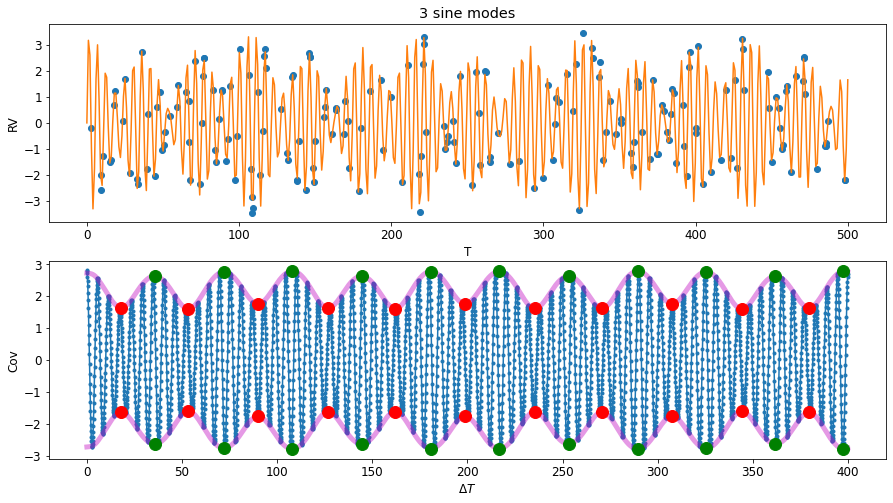

In [51]:
t = np.sort(np.random.uniform(low=0.0, high=500, size=200))
t_plot = np.linspace(0, 500, 500)

def function3(t):
    return np.sin(2*np.pi/5*t) + 0.5*np.sin(2*np.pi/5.5*t) + 2*np.sin(2*np.pi/5.8*t)

Delta_t = np.arange(4000)/10
cov_XY = []
for delta_t in Delta_t:
    X = function3(t)
    Y = function3(t+delta_t)
    cov_XY.append(cov(X, Y))
cov_XY = np.array(cov_XY)
analytic_signal = hilbert(cov_XY)
amplitude_envelope = np.abs(analytic_signal)
amplitude_envelope = moving_ave(Delta_t, amplitude_envelope, width=2)
peaks1, prop1 = find_peaks(amplitude_envelope, height=0.1)
peaks2, prop2 = find_peaks(-amplitude_envelope, height=-10)

fig = plt.figure(figsize=(15, 8))

plt.subplot(211)
title='3 sine modes'
plt.title(title)
plt.plot(t, function3(t), 'o')
plt.plot(t_plot, function3(t_plot))
plt.xlabel('T')
plt.ylabel('RV')

plt.subplot(212)
plt.plot(Delta_t, cov_XY, '.-')
plt.plot(Delta_t, amplitude_envelope, 'm', lw=5, alpha=0.4)
plt.plot(Delta_t, -amplitude_envelope, 'm', lw=5, alpha=0.4)
plt.plot(Delta_t[peaks1], prop1['peak_heights'], 'o', color='green', markersize=12)
plt.plot(Delta_t[peaks1], -prop1['peak_heights'], 'o', color='green', markersize=12)
plt.plot(Delta_t[peaks2], prop2['peak_heights'], 'o', color='red', markersize=12)
plt.plot(Delta_t[peaks2], -prop2['peak_heights'], 'o', color='red', markersize=12)
plt.xlabel(r'$\Delta T$')
plt.ylabel('Cov')


In [55]:
def ts_statistics(t, y, yerr, title, Delta_t_max, width=0.2, simple_plot=True):
    from statsmodels.nonparametric.kernel_regression import KernelReg

    
    gp = GP_fit_p1(t, y, yerr, p=5.2)
    # gp = GP_fit_Matern52Kernel(x=t, yerr=yerr, r=1)
    
    if simple_plot == False:
        fig = plt.figure(figsize=(15, 18))
        plt.subplots_adjust(right=0.85, hspace=0.5)
    else:
        fig = plt.figure(figsize=(15, 12))
        plt.subplots_adjust(right=0.85, hspace=0.3)
        
    plt.rcParams.update({'font.size': 12})

    # Fig 1 - data time series 
    if simple_plot == False:
        plt.subplot(611)
    else:
        plt.subplot(311)
    plt.title(title)
    plt.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
    x = np.linspace(min(t), max(t), 10*len(t))
    pred_mean, pred_var = gp.predict(y, x, return_var=True)
    pred_std = np.sqrt(pred_var)        
    plt.plot(x, pred_mean, color='r', alpha=0.3)
    plt.fill_between(x, pred_mean+pred_std, pred_mean-pred_std, color='r', alpha=0.1,
                     edgecolor="none")
    plt.xlabel("T [minutes]")
    plt.ylabel("RV [m/s]")
    plt.grid()

    
    # Fig 2 - Covariance 
    if simple_plot == False:
        plt.subplot(612)
    else:
        plt.subplot(312)
    Delta_t = np.linspace(0, Delta_t_max, 5*len(t[t<Delta_t_max]))
    cov_XY = []
    for delta_t in Delta_t:
        X = y[t<(max(t)-delta_t)]
        Y, _ = gp.predict(y, t[t<(max(t)-delta_t)]+delta_t, return_var=False)
        cov_XY.append(cov(X, Y))
    cov_XY = np.array(cov_XY)
    analytic_signal = hilbert(cov_XY)
    amplitude_envelope = np.abs(analytic_signal)
    amplitude_envelope = moving_ave(Delta_t, amplitude_envelope, width=2)
    # kr = KernelReg(amplitude_envelope, Delta_t, 'c')
    # ae_pred, ae_std = kr.fit(Delta_t)
    plt.plot(Delta_t, cov_XY, 'k.-', alpha=0.5)
    plt.plot(Delta_t, amplitude_envelope, 'm', lw=5, alpha=0.4)
    plt.plot(Delta_t, -amplitude_envelope, 'm', lw=5, alpha=0.4)        
    plt.xlabel(r'$\Delta$T [minutes]')
    plt.ylabel(r'Covariance [m$^2$/s$^2$]')
    if max(Delta_t)>250:
        plt.xlim([0,250])
    plt.grid()
    
    if simple_plot ==True:
        plt.subplot(313)
        plt.plot(Delta_t, cov_XY, 'k.-', alpha=0.5)
        plt.plot(Delta_t, amplitude_envelope, 'm', lw=5, alpha=0.4)
        plt.plot(Delta_t, -amplitude_envelope, 'm', lw=5, alpha=0.4)        
        plt.xlabel(r'$\Delta$T [minutes]')
        plt.ylabel(r'Covariance [m$^2$/s$^2$]') 
        plt.xlim([0,32])
        plt.grid()
    
    plt.savefig('./NEID_cov/'+title+'.png')
    plt.show()
    
    return Delta_t, amplitude_envelope

# 1 mode, Q = 6

In [56]:
t[-5]

345

/tmp/ipykernel_39588/1066055735.py:26: RuntimeWarning: invalid value encountered in sqrt
  pred_std = np.sqrt(pred_var)


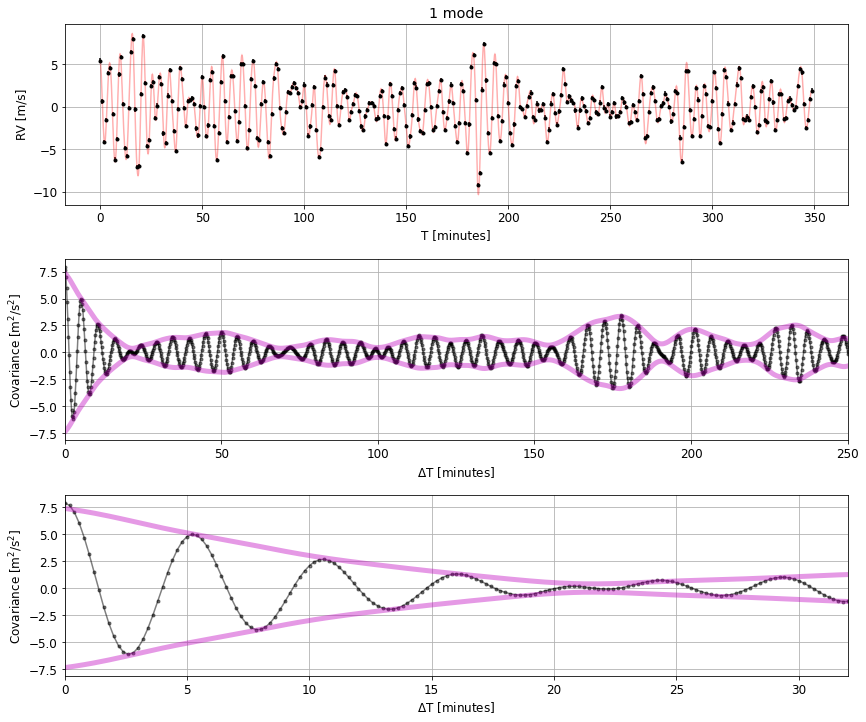

/tmp/ipykernel_39588/1066055735.py:26: RuntimeWarning: invalid value encountered in sqrt
  pred_std = np.sqrt(pred_var)


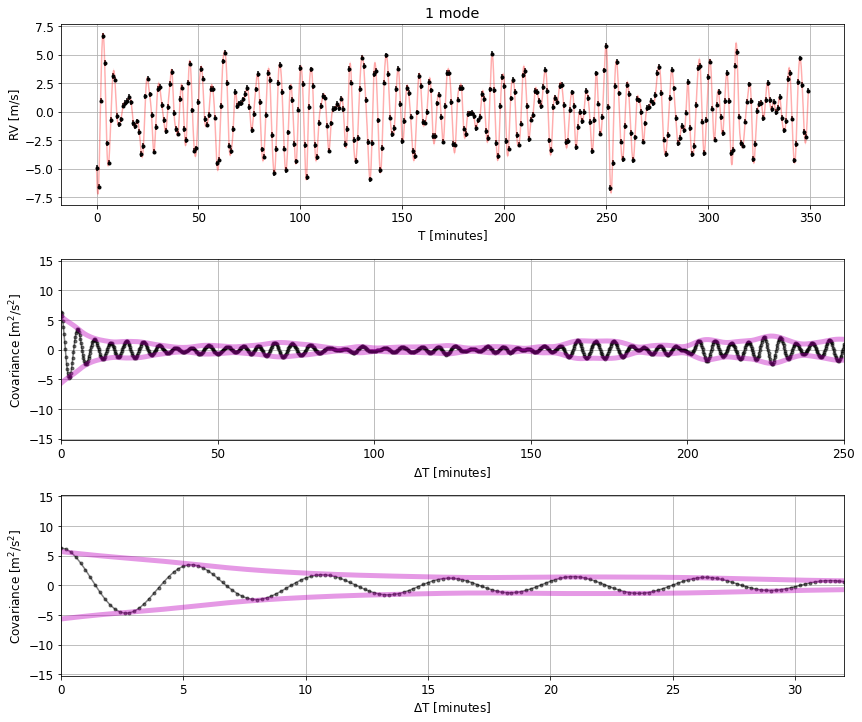

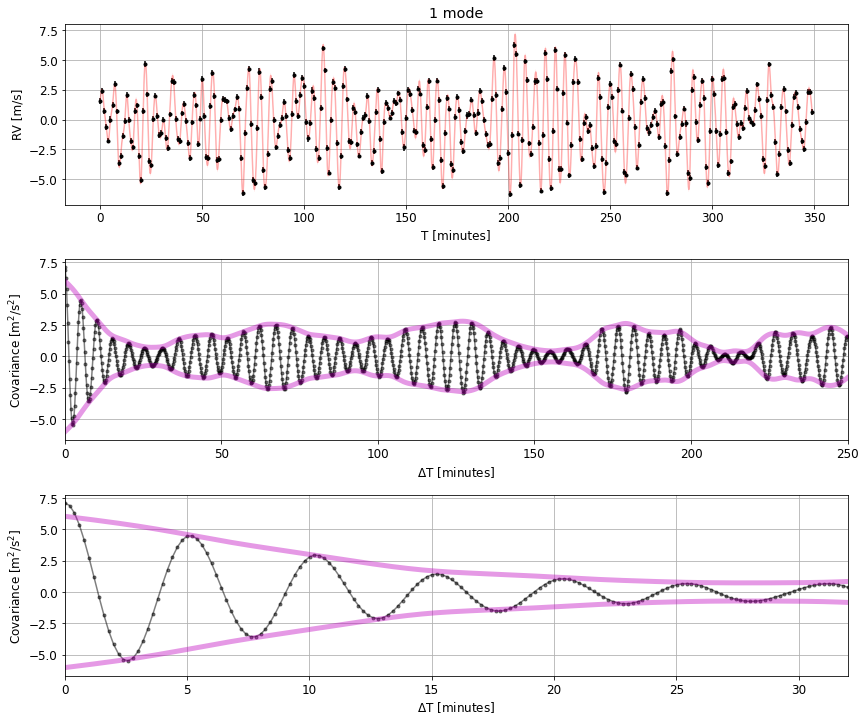

In [57]:
S0 = 1
Q = 6
w0 = 1.194540843699886
N = 350

for i in range(3):

    t = np.arange(N)
    yerr = (np.random.normal(0.05, 0.03, N)**2 + 0.24**2)**0.5

    kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0))
    gp = celerite.GP(kernel)
    gp.compute(t, yerr)

    y = gp.sample()

    Delta_t, amplitude_envelope = ts_statistics(t, y, yerr, Delta_t_max=t[-5], width=0.18, title='1 mode')

# 2 modes, Q = 6

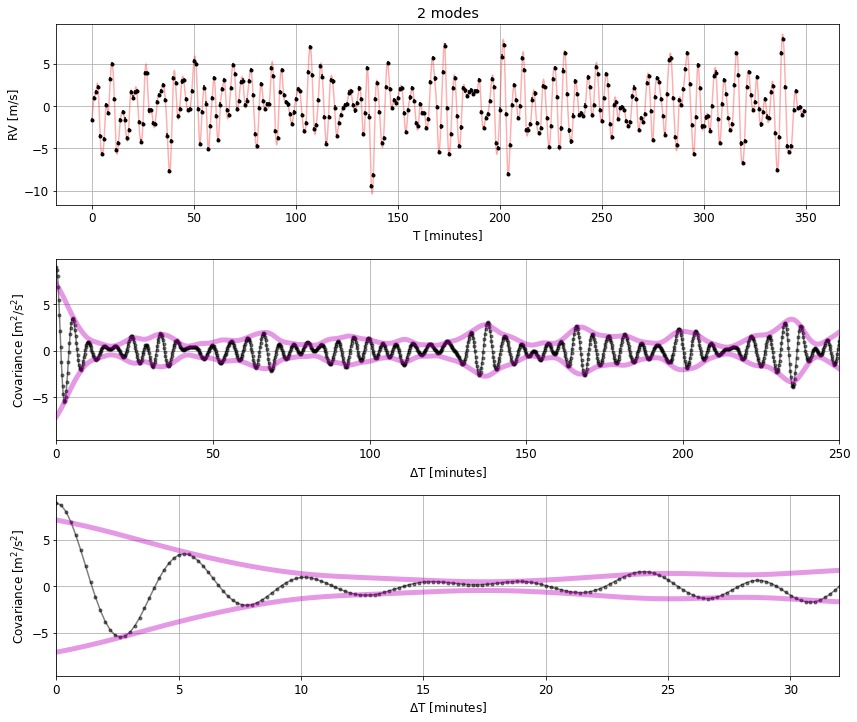

/tmp/ipykernel_39588/1066055735.py:26: RuntimeWarning: invalid value encountered in sqrt
  pred_std = np.sqrt(pred_var)


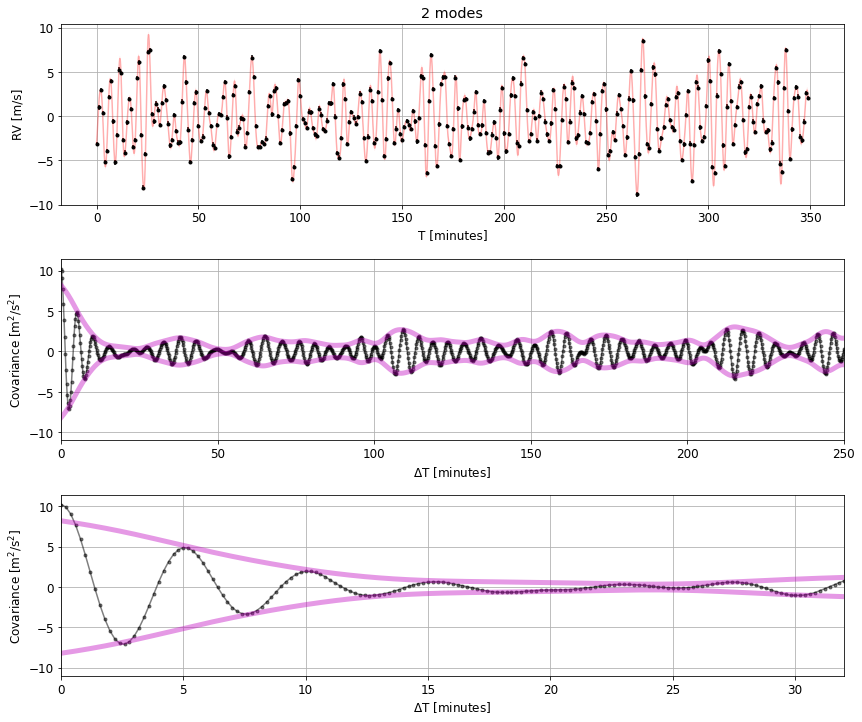

/tmp/ipykernel_39588/1066055735.py:26: RuntimeWarning: invalid value encountered in sqrt
  pred_std = np.sqrt(pred_var)


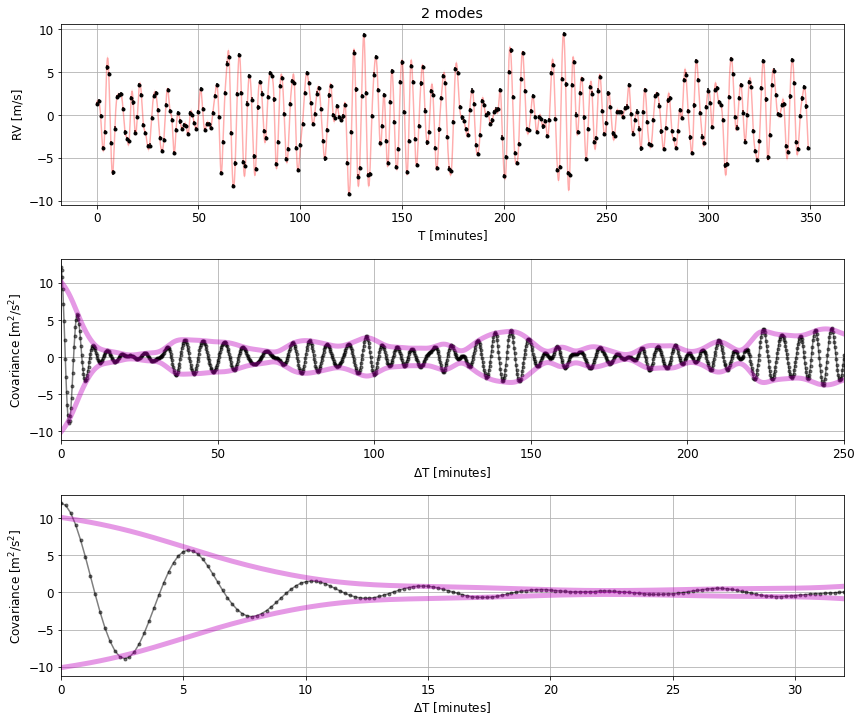

In [26]:
S0 = 1
Q = 6
N = 350

for i in range(3):

    t = np.arange(N)
    yerr = (np.random.normal(0.05, 0.03, N)**2 + 0.24**2)**0.5

    k1 = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(2*np.pi/(1/3033.754e-6/60)))
    k2 = terms.SHOTerm(log_S0=np.log(S0+0.1), log_Q=np.log(Q-2), log_omega0=np.log(2*np.pi/(1/3303.520e-6/60)))   
    kernel = k1 + k2
    gp = celerite.GP(kernel)
    gp.compute(t, yerr)

    y = gp.sample()

    Delta_t, amplitude_envelope = ts_statistics(t, y, yerr, Delta_t_max=t[-5], width=0.18, title='2 modes')

# 1 mode, Q = 50

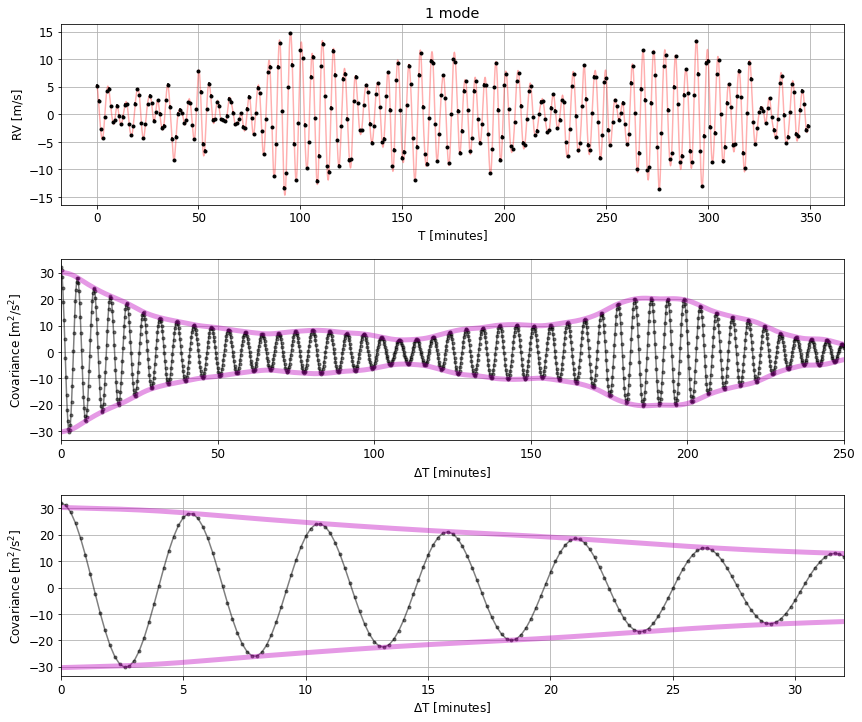

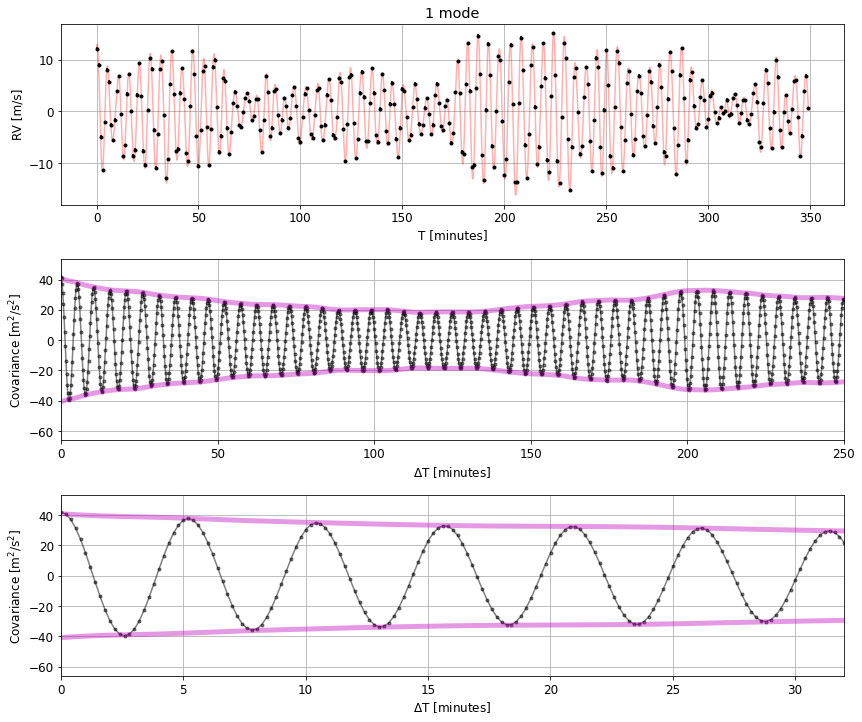

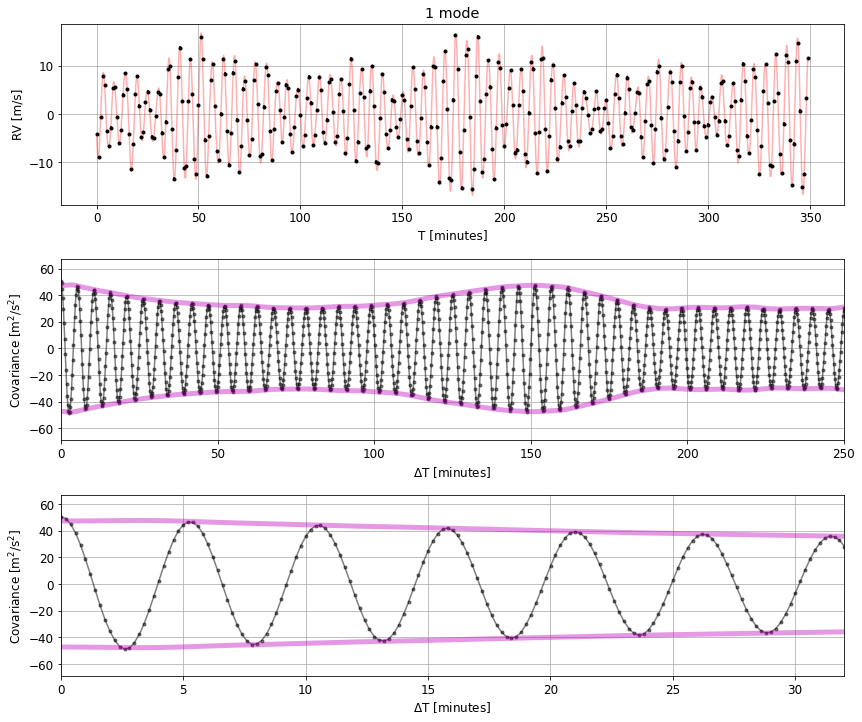

In [27]:
S0 = 1
Q = 50
w0 = 1.194540843699886
N = 350

for i in range(3):

    t = np.arange(N)
    yerr = (np.random.normal(0.05, 0.03, N)**2 + 0.24**2)**0.5

    kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0))
    gp = celerite.GP(kernel)
    gp.compute(t, yerr)

    y = gp.sample()
    
    Delta_t, amplitude_envelope = ts_statistics(t, y, yerr, Delta_t_max=t[-5], width=0.18, title='1 mode')

# Statistics

In [111]:
S0 = 1
Q = 6
w0 = 1.194540843699886
N = 350

beats_widths = np.array([])
beats_heights = np.array([])
beats_centres = np.array([])

for i in range(10):

    t = np.arange(N)
    yerr = (np.random.normal(0.05, 0.03, N)**2 + 0.24**2)**0.5

    kernel = terms.SHOTerm(log_S0=np.log(S0), log_Q=np.log(Q), log_omega0=np.log(w0))
    gp = celerite.GP(kernel)
    gp.compute(t, yerr)

    y = gp.sample()

    Delta_t = np.linspace(0, 300, len(t))
    cov_XY = []
    for delta_t in Delta_t:
        X = y[t<(max(t)-delta_t)]
        Y, _ = gp.predict(y, t[t<(max(t)-delta_t)]+delta_t, return_var=False)
        cov_XY.append(cov(X, Y))
    cov_XY = np.array(cov_XY)
    analytic_signal = hilbert(cov_XY)
    amplitude_envelope = np.abs(analytic_signal)
    amplitude_envelope = moving_ave(Delta_t, amplitude_envelope, width=5) 
    peaks1, prop1 = find_peaks(amplitude_envelope, height=0.1)  # local max 
    peaks2, prop2 = find_peaks(-amplitude_envelope, height=-10) # local min 
    if len(prop1['peak_heights']) == len(np.diff(Delta_t[peaks2])):
        beats_heights = np.hstack((beats_heights, prop1['peak_heights']))
        beats_widths = np.hstack((beats_widths, np.diff(Delta_t[peaks2])))
        beats_centres = np.hstack((beats_centres, Delta_t[peaks1]))
    if len(prop1['peak_heights']) == (len(np.diff(Delta_t[peaks2]))+1):
        beats_heights = np.hstack((beats_heights, prop1['peak_heights'][:-1]))
        beats_widths = np.hstack((beats_widths, np.diff(Delta_t[peaks2])))    
        beats_centres = np.hstack((beats_centres, Delta_t[peaks1][:-1]))
    
    # fig = plt.figure(figsize=(18, 5))
    # plt.plot(Delta_t, cov_XY, 'k.-', alpha=0.5)
    # plt.plot(Delta_t, amplitude_envelope, 'm', lw=5, alpha=0.4)
    # plt.plot(Delta_t, -amplitude_envelope, 'm', lw=5, alpha=0.4)
    # plt.plot(Delta_t[peaks1], prop1['peak_heights'], 'o', color='green', markersize=12)
    # plt.plot(Delta_t[peaks1], -prop1['peak_heights'], 'o', color='green', markersize=12)
    # plt.plot(Delta_t[peaks2], prop2['peak_heights'], 'o', color='red', markersize=12)
    # plt.plot(Delta_t[peaks2], -prop2['peak_heights'], 'o', color='red', markersize=12)    
    # plt.xlabel(r'$\Delta$T [minutes]')
    # plt.ylabel(r'Covariance [m$^2$/s$^2$]')
    # plt.grid()    

print(beats_widths)
print(beats_heights)

[17.19197708 30.94555874 34.38395415 30.08595989 55.8739255  20.63037249
 32.66475645 48.99713467 33.5243553  29.22636103  7.73638968 24.06876791
 30.08595989 26.64756447 58.45272206 19.77077364 33.5243553  43.83954155
 24.92836676 23.20916905 56.73352436 46.41833811 41.26074499 27.50716332
 32.66475645 42.97994269 13.75358166 12.03438395 31.80515759 50.71633238
 30.94555874 24.06876791 64.46991404 29.22636103 36.96275072 65.32951289
 34.38395415 23.20916905 59.31232092 27.50716332 21.48997135 32.66475645
 44.6991404  23.20916905 13.75358166 43.83954155 28.36676218 30.94555874
 32.66475645 18.91117479 13.75358166 29.22636103 24.06876791 32.66475645
 43.83954155 36.96275072 32.66475645 51.57593123 45.55873926 42.97994269
 35.24355301 57.59312321 70.48710602 32.66475645 32.66475645 61.03151862
 22.3495702  38.68194842 22.3495702  57.59312321 41.26074499 44.6991404 ]
[2.08559309 1.84008252 1.56999895 1.54406725 1.86896154 0.75863875
 1.09725727 1.97924324 1.04343746 0.67081306 0.51834486 

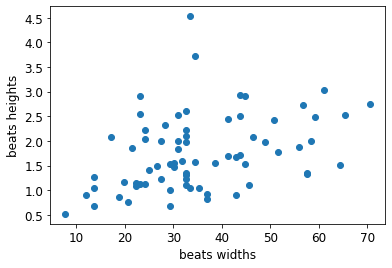

In [116]:
bw = beats_widths
bh = beats_heights
plt.plot(bw, bh, 'o')
plt.xlabel('beats widths')
plt.ylabel('beats heights')
plt.show()

In [70]:
prop1['peak_heights']
# prop2['peak_heights']

array([1.9501966 , 2.95152937, 2.84168326, 1.93032409])

In [72]:
np.diff(Delta_t[peaks2])

array([47.56446991, 27.50716332, 28.65329513, 36.67621777])

In [77]:
prop1['peak_heights'][:-1]

array([2.53893558, 1.71312895])